Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [153]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [15]:
# YOUR CODE GOES HERE

print( ' Transactions ', transactions.shape)
print( ' Items ', items.shape)
print( ' Item_categories ', item_categories.shape)
print( ' Shops ', shops.shape)

transactions.head(3)

#items.head(3)

#item_categories.head(15)

#shops.head(3)

 Transactions  (2935849, 6)
 Items  (22170, 3)
 Item_categories  (84, 2)
 Shops  (60, 2)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [154]:
#txn = transactions.head(6)
import time
%time
transactions['day'], transactions['month'], transactions['year'] = transactions['date'].str.split('.').str



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [38]:
#transactions.head(3)

transactions_filtered = transactions[transactions['year'] == '2014']

In [40]:
transactions_filtered_sep_2014 = transactions_filtered[transactions_filtered['month'] == '09']

In [41]:
transactions_filtered_sep_2014.shape

(73157, 9)

In [45]:
#transactions_filtered_sep_2014.head(4)
#transactions_filtered_sep_2014['revenue'] 
#= transactions_filtered_sep_2014['item_price'].float * transactions_filtered_sep_2014['item_cnt_day'].float

txn_sep2014 = transactions_filtered_sep_2014 
txn_sep2014['revenue'] = txn_sep2014.apply(lambda r : r['item_price'] * r['item_cnt_day'], axis= 1)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
#txn_sep2014.head(3)


txn_rev_shopid =  txn_sep2014.groupby('shop_id').agg({'revenue': 'sum'})


In [53]:
#txn_rev_shopid.groupby('shop_id').agg({'revenue': 'max'})

txn_rev_shopid[txn_rev_shopid['revenue'] == txn_rev_shopid['revenue'].max()]


,revenue
shop_id,
31,7982852.2


In [54]:
# YOUR CODE GOES HERE

max_revenue =  7982852.2  # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [59]:
transactions_filtered.head(4)
#transactions_filtered.shape

txn_summer = transactions_filtered[transactions_filtered['month'].isin(['06','07','08'])]


In [62]:
txn_summer.head(4)

txn_summer['rev'] = txn_summer.apply( lambda r : r['item_price'] * r['item_cnt_day'] , axis=1 )

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [95]:
txn_summer_item_id_rev =  txn_summer.groupby('item_id' , as_index=False).agg({'rev':'sum'})


In [98]:
txn_summer_rev_cat = pd.merge(txn_summer_item_id_rev, items, on='item_id')
#items.head(4)
txn_summer_rev_cat.head(3)



,item_id,rev,item_name,item_category_id
0,1,8980.0,!ABBYY FineReader 12 Professional Edition Full...,76
1,2,58.0,***В ЛУЧАХ СЛАВЫ (UNV) D,40
2,3,158.0,***ГОЛУБАЯ ВОЛНА (Univ) D,40


In [99]:
txn_Rev_cat_grouped = txn_summer_rev_cat.groupby('item_category_id' , as_index=False).agg({'rev':'sum'})



In [100]:

txn_Rev_cat_grouped[ txn_Rev_cat_grouped['rev'] == txn_Rev_cat_grouped['rev'].max() ]

#txn_rev_shopid[txn_rev_shopid['revenue'] == txn_rev_shopid['revenue'].max()]

,item_category_id,rev
15,20,32157302.43


In [101]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [190]:

#transactions.head()

txn_price_min_max = transactions.groupby('item_id', as_index=False).agg({'item_price' : ['min', 'max'] })

In [191]:
#txn_price_min_max.head(19)

print(txn_price_min_max.shape)

tot =  txn_price_min_max[  txn_price_min_max['item_price']['max'] == txn_price_min_max['item_price']['min']  ]

tot.describe()
#txn_price_min_max.describe()

(21807, 3)


item_id     item_price               
                               min            max
count   5926.000000    5926.000000    5926.000000
mean    9940.335640     963.763202     963.763202
std     6874.732002    4544.403332    4544.403332
min        0.000000       7.000000       7.000000
25%     3992.000000     149.000000     149.000000
50%     9118.500000     300.000000     300.000000
75%    15969.500000     999.000000     999.000000
max    22169.000000  307980.000000  307980.000000

In [192]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [183]:
#transactions.head()

txn_shop_25 = transactions[ ( transactions['shop_id'] == 25) & ( transactions['year'] == '2014') & ( transactions['month'] == '12')]

#df[df[['col_1','col_2']].apply(lambda x: f(*x), axis=1)]


def f(*x):
    #return x['shop_id'] == '25' and x['year'] == 2014 and x['month'] == 12
    return x[0] == 25 and x[1] == '2014' and x[2] == '12'

#txn_shop_25 = transactions[transactions[['shop_id','year', 'month']].apply( lambda x : f(*x), axis=1)]


#txn_shop_25 = transactions[ transactions['year'] == '2014']


#txn_shop_25 = txn_shop_25[txn_shop_25['year'] == 2014]
#txn_shop_25 = txn_shop_25[txn_shop_25['month'] == 12]

#transactions.year.unique()


In [185]:
#transactions.describe()
#txn_shop_25.groupby('')

#txn_shop_25.head(4)

txn_shop_25_day_cnt =  txn_shop_25.groupby('date', as_index=False).agg({'item_cnt_day': 'sum'})


In [196]:
txn_shop_25_day_cnt.item_cnt_day.min()

143.0

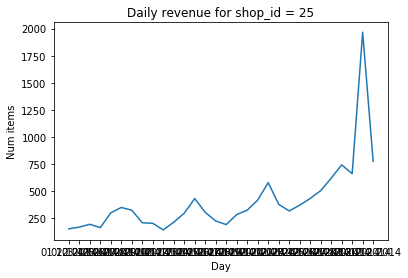

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [198]:
shop_id = 25

total_num_items_sold = txn_shop_25_day_cnt.item_cnt_day # YOUR CODE GOES HERE
days = txn_shop_25_day_cnt.date # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [199]:
STUDENT_EMAIL = 'anjandash@gmail.com'
STUDENT_TOKEN = 'WigKlXIkbUZXGGjI'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [200]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)